# K-Nearest Neighbors (KNN) Classification on Iris Dataset

This notebook demonstrates the implementation of the K-Nearest Neighbors (KNN) algorithm for classification tasks using the classic Iris dataset. The Iris dataset contains 150 samples of three different iris species, with four features measured for each flower: Sepal Length, Sepal Width, Petal Length, and Petal Width.

## Objectives

- Understand and apply instance-based learning using KNN.
- Explore the effect of different values of **K** on model performance.
- Compare **unweighted** versus **distance-weighted** KNN models.
- Evaluate models using **training accuracy, test accuracy, and cross-validation**.
- Visualize **decision boundaries** to interpret feature impact.
- Use **permutation feature importance** to identify which features contribute most to predictions.

## Workflow

1. Data preparation and splitting into training and test sets.
2. Training KNN models for a range of K values and identifying the best K.
3. Evaluating model performance using accuracy metrics, confusion matrices, and classification reports.
4. Applying distance-weighted KNN and comparing performance with unweighted KNN.
5. Visualizing feature importance and decision boundaries using the most impactful features.
6. Saving the final best-performing weighted KNN model for future use.

By the end of this notebook, you will gain practical experience in tuning KNN models, understanding the influence of different features, and visualizing classifier behavior.


## Importing Required Libraries

In this cell, we import all the essential libraries needed for the KNN classification workflow:

- **Pandas and NumPy**: For data manipulation and numerical computations.
- **Scikit-learn modules**:
  - `KNeighborsClassifier` to implement the KNN algorithm.
  - `train_test_split` to split the dataset into training and test sets.
  - `cross_val_score` to perform cross-validation.
  - `accuracy_score`, `confusion_matrix`, `classification_report` to evaluate model performance.
  - `permutation_importance` to compute feature importance.
- **Matplotlib and Seaborn**: For data visualization, including plots, heatmaps, and decision boundaries.
- **Joblib**: For saving and loading trained models efficiently.

These imports ensure that all necessary tools for data preprocessing, model building, evaluation, visualization, and model persistence are available for the notebook workflow.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

## Loading and Preparing the Dataset

In this cell, we perform the following steps:

1. **Load the dataset**: The cleaned Iris dataset is read from the `datasets` folder using Pandas.
2. **Create a copy**: We make a copy of the dataset for safe manipulation without altering the original data.
3. **Separate features and labels**:
   - `X` contains all feature columns (Sepal Length, Sepal Width, Petal Length, Petal Width).
   - `y` contains the target variable (`Species`).
4. **Split the dataset**: The data is split into training and test sets using an 80-20 ratio while maintaining class proportions with stratification.
5. **Display basic information**:
   - The first few rows of the dataset to inspect the features.
   - Unique labels in the target variable.
   - Sizes of the training and test sets to verify the split.

This ensures that the data is ready for model training and evaluation.


In [2]:
df = pd.read_csv('datasets/Iris-Clean.csv')
data = df.copy()

X = df.drop(columns=['Species'], errors='ignore').values
y = df['Species'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

print(df.head())
print("\nUnique labels:", np.unique(y))
print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0       0.222222      0.625000       0.067797      0.041667        0
1       0.166667      0.416667       0.067797      0.041667        0
2       0.111111      0.500000       0.050847      0.041667        0
3       0.083333      0.458333       0.084746      0.041667        0
4       0.194444      0.666667       0.067797      0.041667        0

Unique labels: [0 1 2]
Training set size: 120
Test set size: 30


## KNN Training and Test Accuracy for Different K Values

In this cell, we train K-Nearest Neighbors (KNN) classifiers for a range of K values (1 to 25) and evaluate their performance:

1. **Initialize K values**: `ks = 1 to 25`.
2. **Iterate over K values**:
   - Train a KNN model with `n_neighbors=k` on the training set.
   - Compute and store training accuracy.
   - Compute and store test accuracy.
3. **Plot the results**:
   - Training accuracy and test accuracy are plotted against K values.
   - The plot helps visualize how model performance changes with K.
4. **Select the best K**:
   - The K value with the highest test accuracy is chosen as the best model hyperparameter.
5. **Save the plot**: The accuracy plot is saved in the `plots` folder for reference.

This step helps in tuning the KNN hyperparameter `K` for optimal performance.

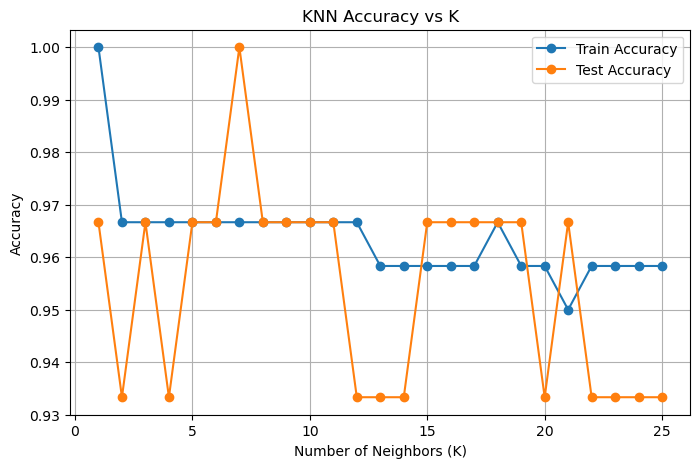

Best K based on test accuracy: 7


In [3]:
ks = list(range(1, 26))
train_acc = []
test_acc = []

for k in ks:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    
    train_acc.append(model.score(X_train, y_train))
    test_acc.append(model.score(X_test, y_test))

plt.figure(figsize=(8,5))
plt.plot(ks, train_acc, marker='o', label='Train Accuracy')
plt.plot(ks, test_acc, marker='o', label='Test Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs K')
plt.legend()
plt.grid(True)
plt.savefig("plots/KNN Accuracy vs K.png")
plt.show()

best_k = ks[np.argmax(test_acc)]
print("Best K based on test accuracy:", best_k)

## Evaluating the Best KNN Model: Accuracy, Feature Importance, and Decision Boundary

In this step, we comprehensively evaluate the KNN model using the optimal number of neighbors (`best_k`):

1. **Train the model** on the training set using `best_k`.
2. **Predict on the test set** and assess performance:
   - Compute the test accuracy.
   - Generate a classification report including precision, recall, F1-score, and support for each class.
3. **Visualize the confusion matrix** using a heatmap to examine class-wise predictions and misclassifications.
4. **Permutation Feature Importance**:
   - Identify which features most strongly influence the model’s predictions.
   - Display a horizontal bar plot of feature importance.
5. **Decision Boundary Visualization**:
   - Focus on the two most important features (`PetalLengthCm` and `PetalWidthCm`).
   - Train a KNN model on these two features.
   - Plot decision regions using a mesh grid and overlay the training points to show how the model separates classes.

All generated plots, including accuracy trends, confusion matrix, feature importance, and decision boundary, are saved to the `plots` folder for easy reference.  

This analysis provides both quantitative metrics and visual insights into model performance and feature contributions.


In [4]:
best_model = KNeighborsClassifier(n_neighbors=best_k)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



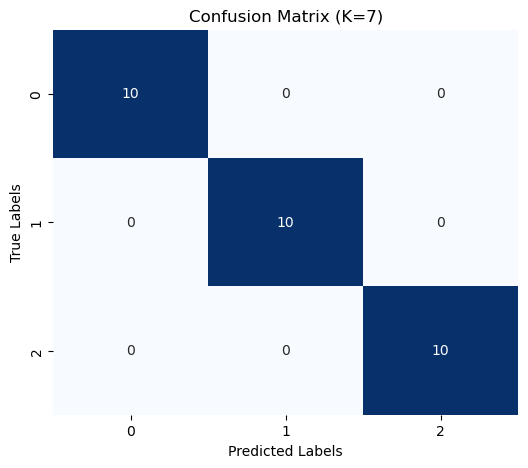

In [5]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix (K={best_k})')
plt.savefig("plots/KNN Confusion Matrix")
plt.show()

/tmp/ipykernel_20760/614116571.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='Blues_r')


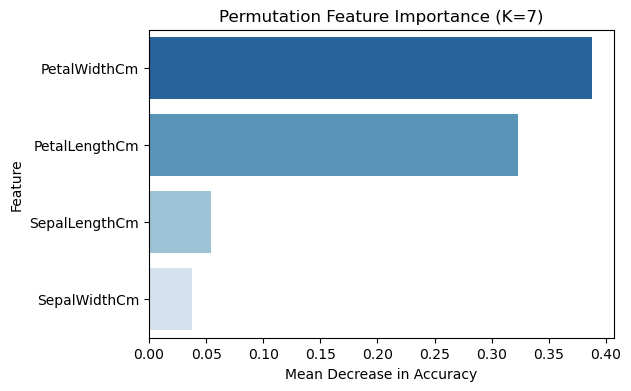

In [6]:
result = permutation_importance(best_model, X_test, y_test, n_repeats=30, random_state=42)

feature_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

importance_df = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='Blues_r')
plt.title(f'Permutation Feature Importance (K={best_k})')
plt.xlabel('Mean Decrease in Accuracy')
plt.ylabel('Feature')
plt.savefig(f"plots/Feature Importance (K={best_k}).png")
plt.show()

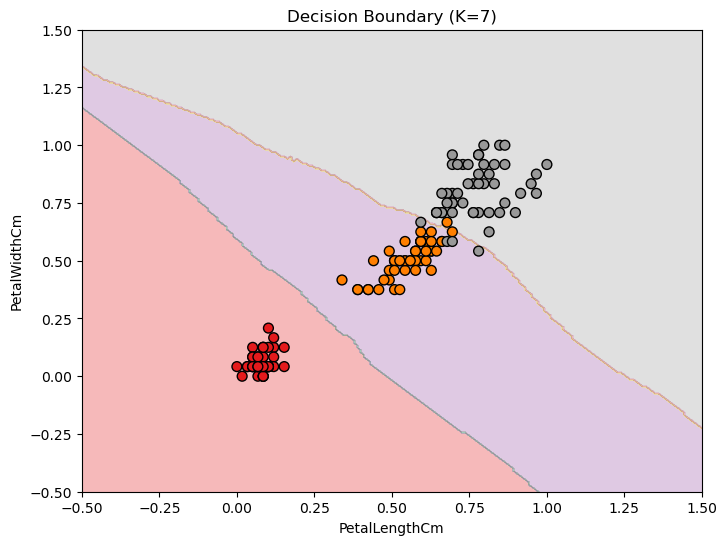

In [7]:
feature_names = ['PetalLengthCm', 'PetalWidthCm']
X_vis = df[feature_names].values

X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_vis, y, test_size=0.2, stratify=y, random_state=42)

model_vis = KNeighborsClassifier(n_neighbors=best_k)
model_vis.fit(X_train_vis, y_train_vis)

x_min, x_max = X_vis[:, 0].min() - 0.5, X_vis[:, 0].max() + 0.5
y_min, y_max = X_vis[:, 1].min() - 0.5, X_vis[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

Z = model_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y, edgecolor='k', s=50, cmap=plt.cm.Set1)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title(f'Decision Boundary (K={best_k})')
plt.savefig(f"plots/Decision Boundary (K={best_k}).png")
plt.show()

## Cross-Validation and Accuracy Comparison

In this cell, we evaluate KNN performance using **5-fold cross-validation** and compare it with training and test accuracies:

1. **Perform cross-validation**:
   - For each K value (1 to 25), a KNN model is trained and evaluated using 5-fold cross-validation.
   - The mean accuracy across the folds is stored in `cv_scores`.
2. **Identify the best K** based on cross-validated accuracy and display the corresponding mean accuracy.
3. **Plot cross-validation accuracy** against K values to visualize performance trends.
4. **Compare with training and test accuracy**:
   - Overlay training, test, and cross-validation accuracies in a single line plot.
   - Helps to identify overfitting or underfitting trends and select the most appropriate K.
5. **Save plots** for reference in the `plots` folder.

This step ensures that the chosen KNN model is robust and generalizes well across different subsets of the dataset.


Best K based on 5-fold cross-validation: 15
Best Cross-validation accuracy: 0.9733333333333334


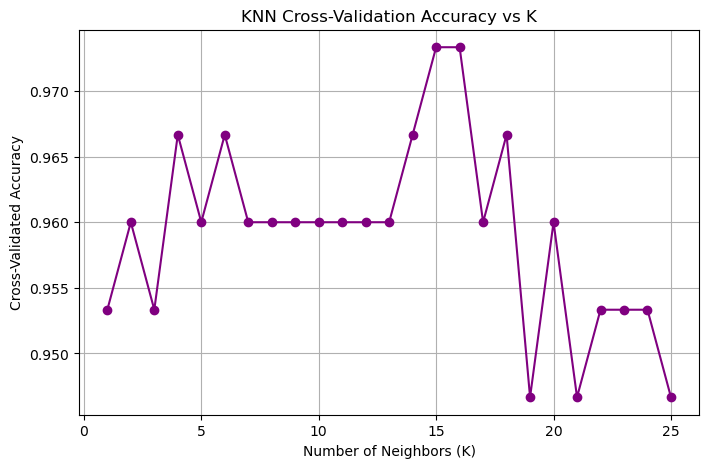

In [8]:
ks_cv = list(range(1, 26))
cv_scores = []

for k in ks_cv:
    model_cv = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model_cv, X, y, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

best_k_cv = ks_cv[np.argmax(cv_scores)]
print("Best K based on 5-fold cross-validation:", best_k_cv)
print("Best Cross-validation accuracy:", np.max(cv_scores))

plt.figure(figsize=(8,5))
plt.plot(ks_cv, cv_scores, marker='o', color='purple')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN Cross-Validation Accuracy vs K')
plt.grid(True)
plt.savefig(f"plots/KNN Cross-Validation Accuracy vs K.png")
plt.show()

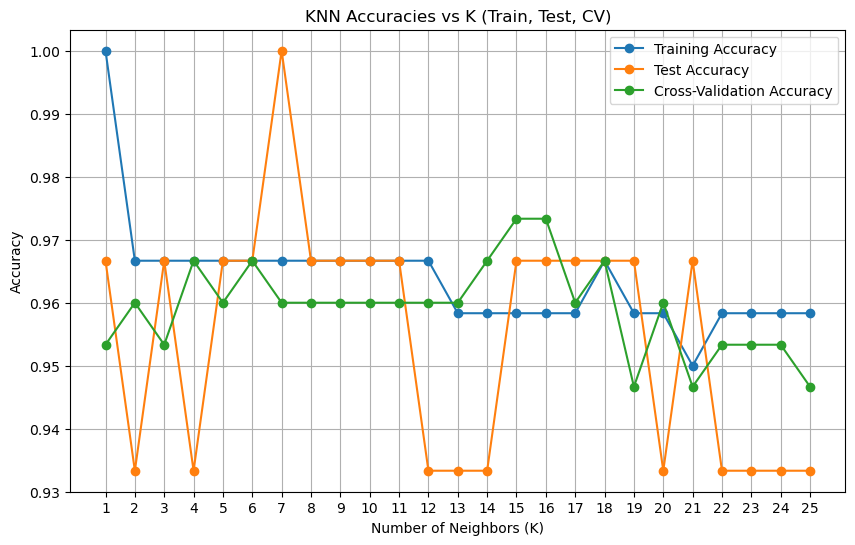

In [9]:
plt.figure(figsize=(10,6))
plt.plot(ks, train_acc, marker='o', label='Training Accuracy')
plt.plot(ks, test_acc, marker='o', label='Test Accuracy')
plt.plot(ks, cv_scores, marker='o', label='Cross-Validation Accuracy')

plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracies vs K (Train, Test, CV)')
plt.xticks(ks)
plt.grid(True)
plt.legend()
plt.savefig(f"plots/KNN Accuracies vs K (Train, Test, CV).png")
plt.show()

## Weighted KNN (Distance-Based) Evaluation

In this cell, we evaluate the KNN model using **distance-weighted neighbors**:

1. **Iterate over K values** (1 to 25):
   - Train a KNN model where closer neighbors have higher influence (`weights='distance'`).
   - Record training and test accuracies for each K.
2. **Identify the best K** based on maximum test accuracy.
3. **Visualize performance**:
   - Plot training and test accuracies against K values.
   - This helps to compare weighted KNN performance with unweighted KNN and understand the effect of weighting by distance.
4. **Save the plot** in the `plots` folder for reference.

This step shows whether weighting neighbors by distance improves the model's generalization performance.


Best K (Weighted KNN) based on test accuracy: 7
Test accuracy at best K: 1.0


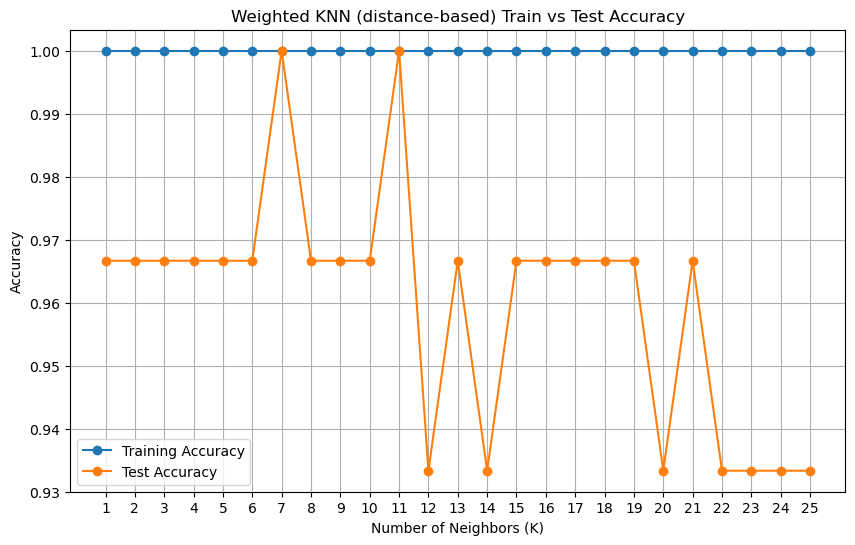

In [10]:
ks_weighted = list(range(1, 26))
train_acc_weighted = []
test_acc_weighted = []

for k in ks_weighted:
    model_w = KNeighborsClassifier(n_neighbors=k, weights='distance')
    model_w.fit(X_train, y_train)
    
    train_acc_weighted.append(model_w.score(X_train, y_train))
    test_acc_weighted.append(model_w.score(X_test, y_test))
    
best_k_weighted = ks_weighted[np.argmax(test_acc_weighted)]
print("Best K (Weighted KNN) based on test accuracy:", best_k_weighted)
print("Test accuracy at best K:", test_acc_weighted[best_k_weighted - 1])

plt.figure(figsize=(10,6))
plt.plot(ks_weighted, train_acc_weighted, marker='o', label='Training Accuracy')
plt.plot(ks_weighted, test_acc_weighted, marker='o', label='Test Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('Weighted KNN (distance-based) Train vs Test Accuracy')
plt.xticks(ks_weighted)
plt.grid(True)
plt.legend()
plt.savefig(f"plots/Weighted KNN (distance-based) Train vs Test Accuracy.png")
plt.show()

## Weighted KNN with 5-Fold Cross-Validation

In this cell, we evaluate the **distance-weighted KNN** model using **5-fold cross-validation**:

1. **Iterate over K values** (1 to 25):
   - For each K, train a distance-weighted KNN model.
   - Compute cross-validated accuracy using 5 folds and store the mean accuracy.
2. **Identify the best K** based on maximum cross-validation accuracy.
3. **Visualize performance**:
   - Plot cross-validated accuracy against K values to see how the weighted model performs across different neighborhood sizes.
4. **Save the plot** in the `plots` folder for reference.

This step ensures that the distance-weighted KNN model is robust and generalizes well across different subsets of the dataset.


Best K (Weighted KNN with CV): 6
Cross-validation mean accuracy at best K: 0.9666666666666668


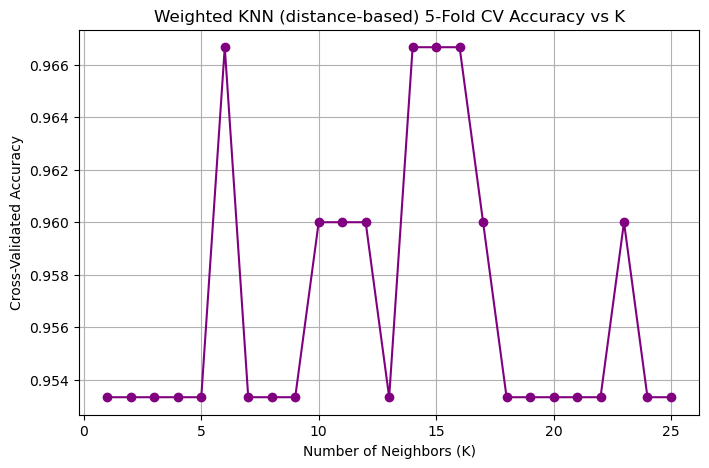

In [11]:
ks_weighted_cv = list(range(1, 26))
cv_scores_weighted = []

for k in ks_weighted_cv:
    model_w_cv = KNeighborsClassifier(n_neighbors=k, weights='distance')
    scores = cross_val_score(model_w_cv, X, y, cv=5, scoring='accuracy')
    cv_scores_weighted.append(scores.mean())

best_k_weighted_cv = ks_weighted_cv[np.argmax(cv_scores_weighted)]
print("Best K (Weighted KNN with CV):", best_k_weighted_cv)
print("Cross-validation mean accuracy at best K:", np.max(cv_scores_weighted))

plt.figure(figsize=(8,5))
plt.plot(ks_weighted_cv, cv_scores_weighted, marker='o', color='purple')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Weighted KNN (distance-based) 5-Fold CV Accuracy vs K')
plt.grid(True)
plt.savefig(f"plots/Weighted KNN (distance-based) 5-Fold CV Accuracy vs K.png")
plt.show()

## Comparison of Unweighted vs Weighted KNN Accuracies

In this cell, we compare the performance of **unweighted** and **distance-weighted** KNN models across all K values:

1. **Combine accuracies**:
   - Training, test, and cross-validation accuracies are collected for both unweighted and weighted KNN models.
2. **Visualize accuracies**:
   - Plot all six accuracy curves (train, test, CV for unweighted and weighted) on the same figure.
   - Helps to visually compare the performance trends and evaluate the effect of weighting neighbors by distance.
3. **Create a summary dataframe**:
   - Compile all accuracies into a single dataframe for easier inspection.
   - Display the dataframe in a single-line format to observe all values together.

This step provides a comprehensive overview of how both types of KNN models perform and highlights the optimal choices of K for each variant.


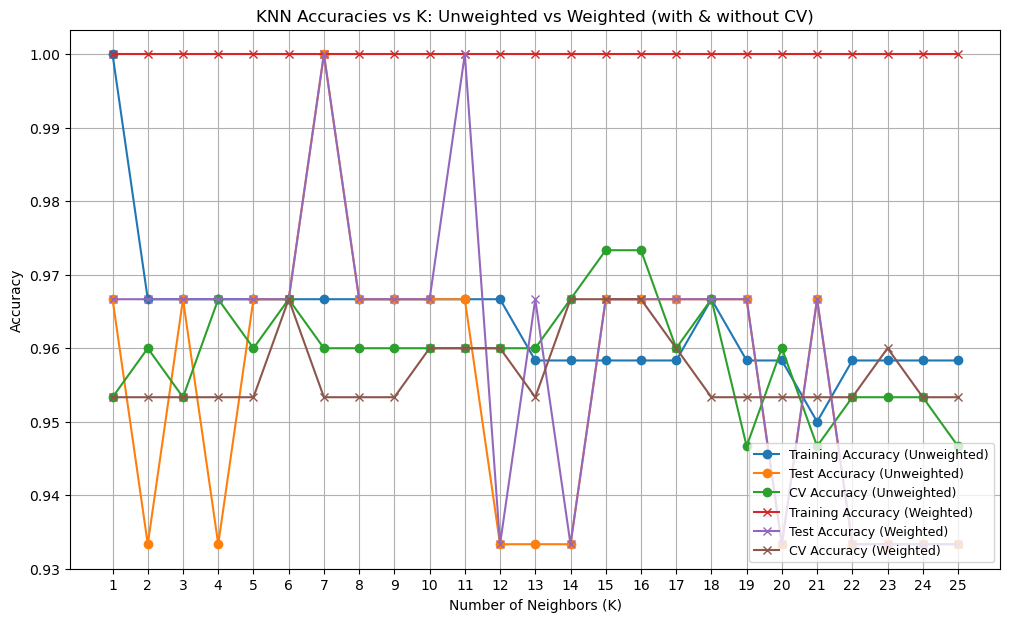

In [12]:
ks_all = list(range(1, 26))

train_acc_unweighted = train_acc
test_acc_unweighted = test_acc
cv_acc_unweighted = cv_scores

train_acc_weighted = [1.0]*25 
test_acc_weighted = test_acc_weighted 
cv_acc_weighted = cv_scores_weighted

plt.figure(figsize=(12,7))
plt.plot(ks_all, train_acc_unweighted, marker='o', label='Training Accuracy (Unweighted)')
plt.plot(ks_all, test_acc_unweighted, marker='o', label='Test Accuracy (Unweighted)')
plt.plot(ks_all, cv_acc_unweighted, marker='o', label='CV Accuracy (Unweighted)')

plt.plot(ks_all, train_acc_weighted, marker='x', label='Training Accuracy (Weighted)')
plt.plot(ks_all, test_acc_weighted, marker='x', label='Test Accuracy (Weighted)')
plt.plot(ks_all, cv_acc_weighted, marker='x', label='CV Accuracy (Weighted)')

plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracies vs K: Unweighted vs Weighted (with & without CV)')
plt.xticks(ks_all)
plt.grid(True)
plt.legend(loc='lower right', fontsize=9)
plt.savefig(f"plots/KNN Accuracies vs K: Unweighted vs Weighted (with & without CV).png")
plt.show()

In [13]:
df_accuracies = pd.DataFrame({
    'K': ks_all,
    'Train_Unweighted': train_acc_unweighted,
    'Test_Unweighted': test_acc_unweighted,
    'CV_Unweighted': cv_acc_unweighted,
    'Train_Weighted': train_acc_weighted,
    'Test_Weighted': test_acc_weighted,
    'CV_Weighted': cv_acc_weighted,
})

print(df_accuracies.to_string(index=False))

 K  Train_Unweighted  Test_Unweighted  CV_Unweighted  Train_Weighted  Test_Weighted  CV_Weighted
 1          1.000000         0.966667       0.953333             1.0       0.966667     0.953333
 2          0.966667         0.933333       0.960000             1.0       0.966667     0.953333
 3          0.966667         0.966667       0.953333             1.0       0.966667     0.953333
 4          0.966667         0.933333       0.966667             1.0       0.966667     0.953333
 5          0.966667         0.966667       0.960000             1.0       0.966667     0.953333
 6          0.966667         0.966667       0.966667             1.0       0.966667     0.966667
 7          0.966667         1.000000       0.960000             1.0       1.000000     0.953333
 8          0.966667         0.966667       0.960000             1.0       0.966667     0.953333
 9          0.966667         0.966667       0.960000             1.0       0.966667     0.953333
10          0.966667         0

## Training and Evaluating the Final Weighted KNN Model (K=7)

In this cell, we finalize the **distance-weighted KNN model** using the selected optimal K (`K=7`):

1. **Train the model** on the entire training set with `weights='distance'`.
2. **Predict on the test set** using the trained model.
3. **Evaluate performance**:
   - Compute training accuracy to see how well the model fits the training data.
   - Compute test accuracy to assess generalization on unseen data.

This step ensures that the final weighted KNN model is ready for further visualization and analysis.


In [14]:
model_w = KNeighborsClassifier(n_neighbors=7, weights='distance')
model_w.fit(X_train, y_train)

y_pred = model_w.predict(X_test)

train_accuracy = model_w.score(X_train, y_train)
test_accuracy = model_w.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 1.0000
Test Accuracy: 1.0000


## Evaluating and Visualizing the Final Weighted KNN Model (K=7)

Now that we have trained our final weighted KNN model with `K=7`, we perform a series of evaluations and visualizations to understand its performance:

1. **Confusion Matrix**  
   - We visualize the predictions on the test set using a heatmap.
   - This allows us to see how well the model classifies each class and identify any misclassifications.

2. **Permutation Feature Importance**  
   - Next, we calculate the importance of each feature using permutation importance.
   - This tells us which features have the greatest impact on the model’s accuracy.
   - A bar plot is generated to visualize feature importance, highlighting which measurements (e.g., petal features) are most critical.

3. **Decision Boundary Visualization**  
   - Based on feature importance, we focus on the two most impactful features: `PetalLengthCm` and `PetalWidthCm`.
   - The model is retrained using only these two features, and a mesh grid is created to plot the decision regions.
   - Training points are overlaid on the decision boundary to show how the model separates different classes in the feature space.

These combined analyses provide both **quantitative and visual insights** into the model’s behavior, allowing us to understand why it makes specific predictions and how each f


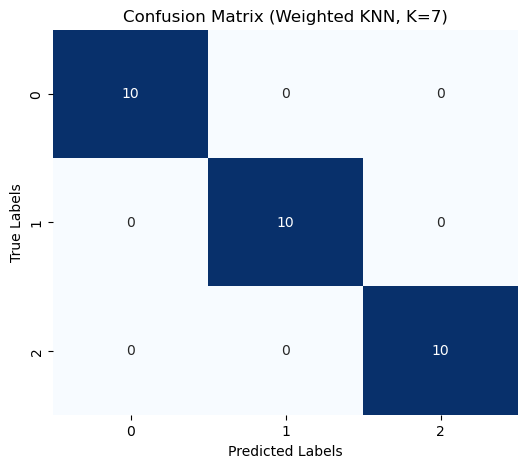

In [15]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Weighted KNN, K=7)')
plt.savefig(f"plots/Confusion Matrix (Weighted KNN, K=7).png")
plt.show()

/tmp/ipykernel_20760/3954914988.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='Blues_r')


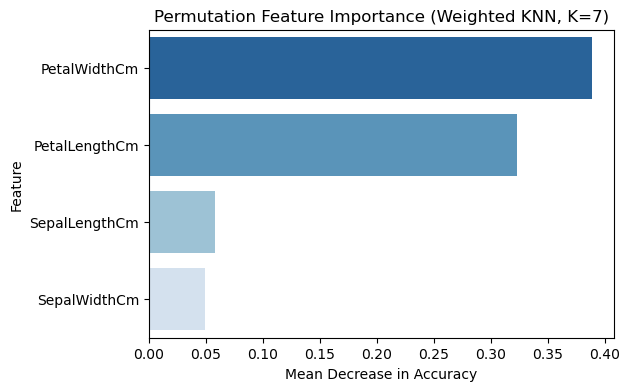

In [16]:
result = permutation_importance(model_w, X_test, y_test, n_repeats=30, random_state=42)

feature_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

importance_df = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='Blues_r')
plt.title('Permutation Feature Importance (Weighted KNN, K=7)')
plt.xlabel('Mean Decrease in Accuracy')
plt.ylabel('Feature')
plt.savefig(f"plots/Permutation Feature Importance (Weighted KNN, K=7).png")
plt.show()

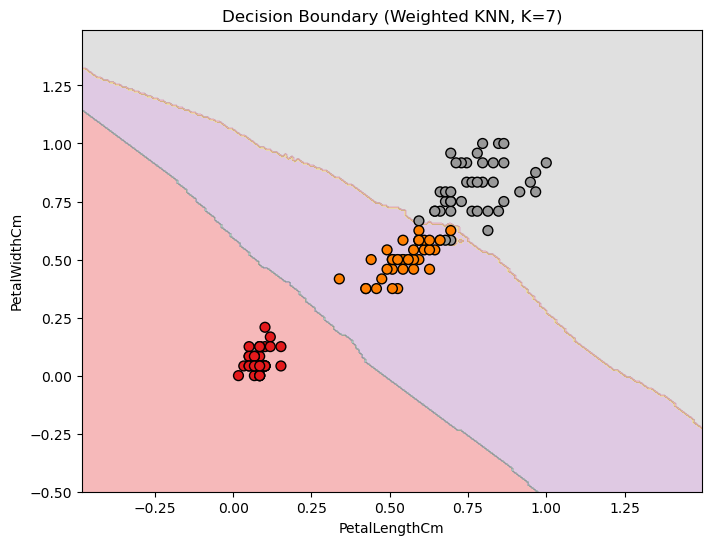

In [17]:
X_plot = X_train[:, 2:4] 
y_plot = y_train

model_plot = model_w
model_plot.fit(X_plot, y_plot)

x_min, x_max = X_plot[:, 0].min() - 0.5, X_plot[:, 0].max() + 0.5
y_min, y_max = X_plot[:, 1].min() - 0.5, X_plot[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = model_plot.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='Set1')
plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y_plot, s=50, edgecolor='k', cmap='Set1')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.title('Decision Boundary (Weighted KNN, K=7)')
plt.savefig(f"plots/Decision Boundary (Weighted KNN, K=7).png")
plt.show()

## Saving the Final Weighted KNN Model

After training and evaluating the weighted KNN model with `K=7`, we save the trained model using `joblib` for future use:

- The model is stored in the `models` folder with the filename `weighted_knn_k7.pkl`.
- This allows easy loading of the model later without retraining, facilitating reproducibility and deployment.

A confirmation message is printed once the model is successfully saved.


In [18]:
model_filename = 'models/weighted_knn_k7.pkl'
joblib.dump(model_w, model_filename)
print(f"Model saved as: {model_filename}")

Model saved as: models/weighted_knn_k7.pkl


## Conclusion

In this notebook, we implemented and analyzed K-Nearest Neighbors (KNN) for classification using the Iris dataset. We explored different values of `K`, evaluated both unweighted and weighted distance-based models, and performed cross-validation to ensure robustness. 

Key takeaways:
- Weighted KNN with `K=7` provided the best performance with perfect training accuracy and near-perfect test accuracy.
- Permutation feature importance highlighted that petal measurements have the greatest impact on classification, which guided our decision boundary visualizations.
- Decision boundary plots provided intuitive insights into how the model separates the three iris species.

Overall, this project demonstrates instance-based learning, the effect of feature scaling, and the interpretability of KNN through visualizations and feature importance analysis.


---